<a href="https://colab.research.google.com/github/bayashi-cl/statistical-learning/blob/main/lab/02_StatisticalLearning_Lab_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install blackcellmagic

In [3]:
%load_ext blackcellmagic

In [51]:
from math import pi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image, display_png

sns.set()

# 2.3 Lab
## 2.3.1 基本コマンド

### 関数・代入

リストを作り、それを変数 `x` に代入する。

`np.array`で`numpy`の配列に変換できる。

In [8]:
x_list = [1, 6, 2]
x = np.array(x_list)
y = np.array((1, 4, 3))
print(x, y, sep="\n")

[1 6 2]
[1 4 3]


#### 関数の定義
```
def 関数名(引数):
  関数本体
```

返される値を`return`の後に記述する

In [9]:
def mul2(x):
  return x * 2

a = 5
print(mul2(5))

10


#### 配列の長さの取得

`len` 関数を使う

In [11]:
print(len(x))

3


#### 四則演算

`np.ndarray`に対してはスカラーと同様に足し算などができる。

In [12]:
print(4 + 3)
print(x + y)

7
[ 2 10  5]


#### 変数の確認・削除

変数の削除は `del` 文でできる。

In [15]:
a = 4
del a
# print(a)

NameError: ignored

#### 等差数列の作成

`np.arange`や`np.linspace`を使う

In [20]:
# 初項・末項を半開区間で指定（公差は1）
print(np.arange(0, 6))

# 初項・末項・項数を指定
print(np.linspace(-pi, pi, 6))

[0 1 2 3 4 5]
[-3.14159265 -1.88495559 -0.62831853  0.62831853  1.88495559  3.14159265]


#### 行列の作成

`np.ndarray`で行列も表現できる

In [22]:
# 1*4のベクトルを2*2の行列に変換
x = np.arange(4).reshape((2, -1))
print(x)
# 変換の向きを変更する
y = np.arange(4).reshape((2, -1), order = "F")
print(y)

[[0 1]
 [2 3]]
[[0 2]
 [1 3]]


#### 行列演算


In [23]:
# 各要素に対する操作
print(np.sqrt(x))
print(x**0.5)

# 行列の積
print(x @ y)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]
[[ 1  3]
 [ 3 13]]


#### 乱数生成

`np.random.randn`, `np.random.normal` 関数で正規分布に従う乱数を生成できる

In [27]:
x = np.random.randn(50)
y = x + np.random.normal(loc=50, scale=0.1, size=50)
# ベクトル同士の共分散を計算
print(np.corrcoef(x, y))

[[1.         0.99475528]
 [0.99475528 1.        ]]


#### 乱数の固定

seedを固定することで同じ乱数が生成されるようになる。

In [28]:
print(np.random.randn(5))
print(np.random.randn(5))
print("\nset seed 1303")
np.random.seed(1303)
print(np.random.randn(5))
print("\nset seed 1303")
np.random.seed(1303)
print(np.random.randn(5))
print(np.random.randn(5))

# 注意：同じseedから常に同じデータが生成されるのではなく、データが生成される"順番"が同じになる。

[-0.67341321 -1.02882575 -1.98025173 -0.72813673 -0.20617063]
[ 1.87072494  0.70041701 -0.6414496   0.99964988  1.35184054]

set seed 1303
[-0.03425693  0.06035959  0.45511859 -0.36593175 -1.6773304 ]

set seed 1303
[-0.03425693  0.06035959  0.45511859 -0.36593175 -1.6773304 ]
[ 0.5910023   0.41090101  0.46972388 -1.50462476 -0.70082238]


#### 基本統計量の計算

それぞれ対応する関数がある

In [29]:
np.random.seed(3)
x = np.random.randn(100)
print("平均")
print(x.mean())
print("分散")
print(x.var())
print("標準偏差")
print(x.std())

平均
-0.10863707440606224
分散
1.132081888283007
標準偏差
1.0639933685333791


## 2.3.2 グラフの作成

`matplotlib`パッケージを使う


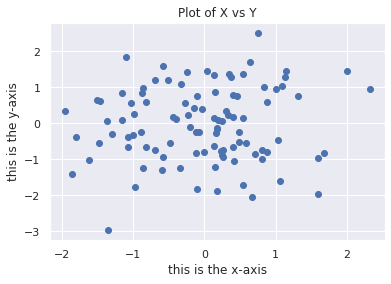

In [33]:
x_norm = np.random.randn(100)
y_norm = np.random.randn(100)
# 散布図を作成
plt.scatter(x_norm, y_norm)
plt.xlabel("this is the x-axis")
plt.ylabel("this is the y-axis")
plt.title("Plot of X vs Y")
# 作成したグラフを表示
plt.show()

In [ ]:
x_norm = np.random.randn(100)
y_norm = np.random.randn(100)
plt.scatter(x_norm, y_norm, color="orange")
plt.xlabel("this is the x-axis")
plt.ylabel("this is the y-axis")
plt.title("Plot of X vs Y")
# グラフを保存する
plt.savefig("fig.png")

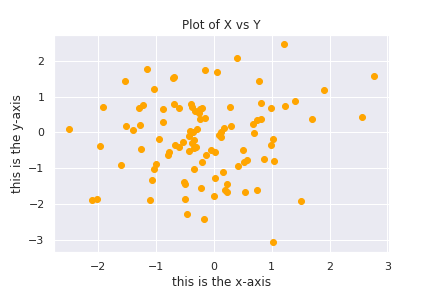

In [37]:
display_png(Image("fig.png"))

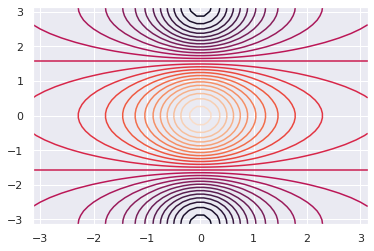

In [42]:
def fun(X, Y):
  return np.cos(y) / (1 + X**2)
x_axis = np.linspace(-pi, pi, 50)
y_axis = np.linspace(-pi, pi, 50)
x, y = np.meshgrid(x_axis, y_axis)
f = fun(x, y)

# 等高線グラフ
plt.contour(x, y, f, levels=30)
plt.show()

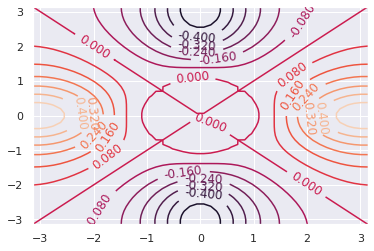

In [46]:
fa = (f - f.T) / 2
cs = plt.contour(x, y, fa, levels=15)
plt.clabel(cs)
plt.show()

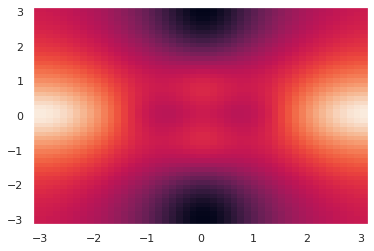

In [48]:
# ヒートマップ
plt.pcolor(x, y, fa)
plt.show()

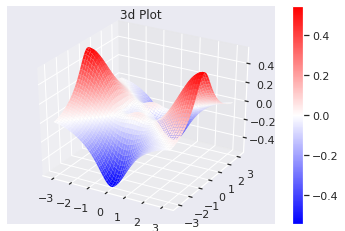

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, fa, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("3d Plot")
plt.show()

#### plotly

plotlyを使うと動かせるグラフを作ることができる

In [52]:
fig = go.Figure(data=[go.Surface(z=fa, x=x, y=y)])
fig.show()